# **SALES PREDICTION**

In this case study, I aim to build a retail sales prediction model using Linear Regression algorithm. The main objective of this model is to predict Retail Sales based on variables that affect sales, such as year, month, supplier, type of goods, retail transfer, and sales from warehouse. By building this model, I hope to identify significant factors that affect sales and utilize the prediction results to help make better business decisions related to inventory management, sales strategy, and resource allocation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [ ]:
data = pd.read_csv('Retail and wherehouse Sale.csv')
data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YEAR,30000.0,NaN,NaN,NaN,2020.0,0.0,2020.0,2020.0,2020.0,2020.0,2020.0
MONTH,30000.0,NaN,NaN,NaN,3.911467,2.836788,1.0,1.0,3.0,7.0,9.0
SUPPLIER,29967,290,"THE COUNTRY VINTNER, LLC DBA WINEBOW",2041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITEM CODE,30000,15668,13811,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITEM DESCRIPTION,30000,15732,LINGANORE BLACK RAVEN - 750ML,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITEM TYPE,30000,8,WINE,18680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RETAIL SALES,29999.0,NaN,NaN,NaN,6.939796,33.081054,-0.42,0.0,0.16,2.92,2739.0
RETAIL TRANSFERS,30000.0,NaN,NaN,NaN,6.594058,27.879428,-6.0,0.0,0.0,3.0,1507.0
WAREHOUSE SALES,30000.0,NaN,NaN,NaN,27.431031,272.166085,-3999.0,0.0,1.0,6.0,18317.0


In [ ]:
data.shape

(30000, 9)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,33
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,1
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [ ]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

In [ ]:
data.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,0
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,0
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [ ]:
data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [ ]:
data.describe(include='object').T

,count,unique,top,freq
SUPPLIER,30000,290,"THE COUNTRY VINTNER, LLC DBA WINEBOW",2074
ITEM CODE,30000,15668,13811,4
ITEM DESCRIPTION,30000,15732,LINGANORE BLACK RAVEN - 750ML,5
ITEM TYPE,30000,8,WINE,18680


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          30000 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      30000 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


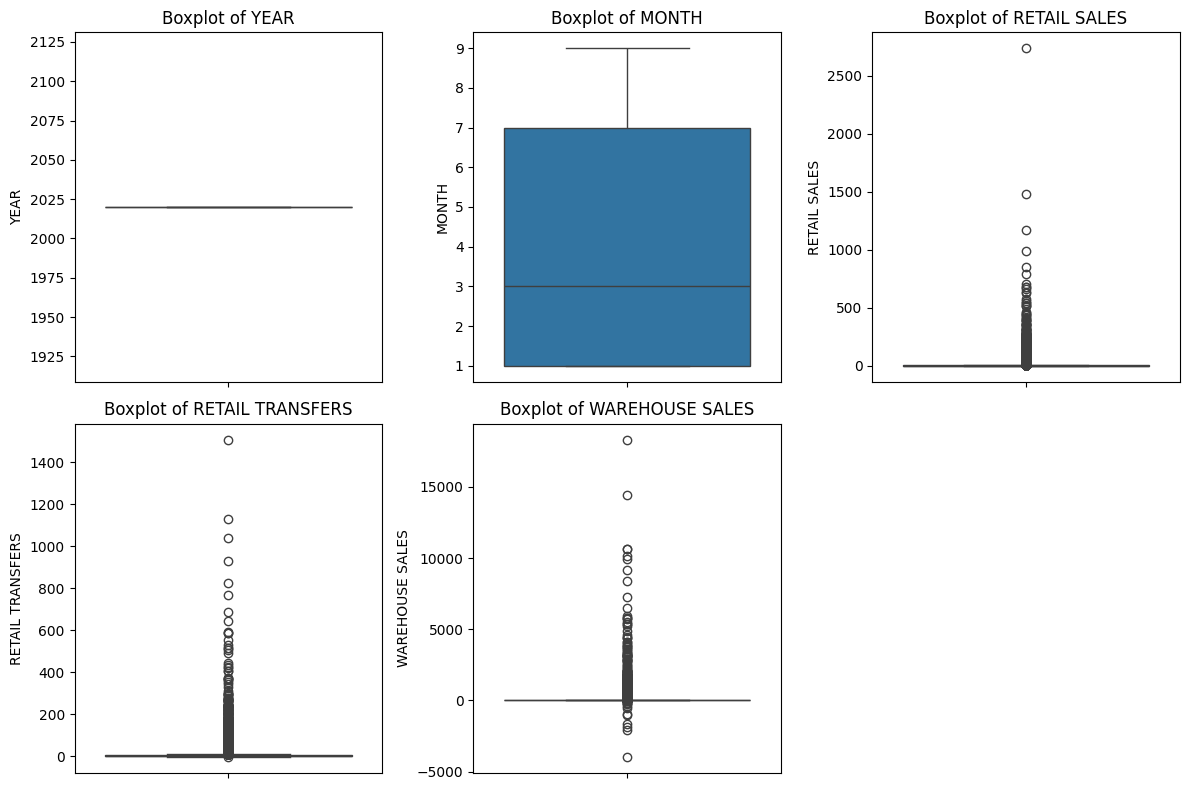

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])


plt.figure(figsize=(12, 8))


for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=numerical_columns[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()


plt.show()

# **DATA INSIGHT**

In [ ]:
data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [ ]:
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

In [ ]:
data['Month'] = data['MONTH'].map(month_map)

In [ ]:
data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,Month
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,January
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,January
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,January
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,January
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,January


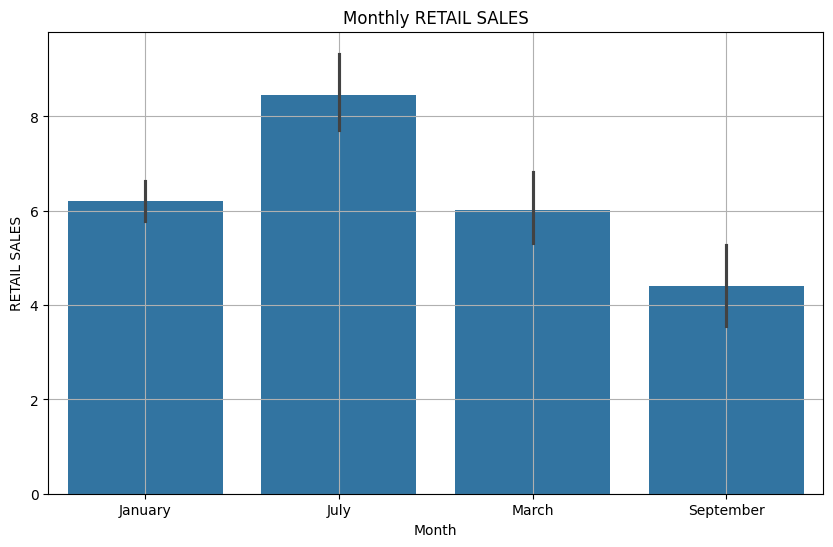

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='RETAIL SALES', data=data)

plt.title('Monthly RETAIL SALES')
plt.xlabel('Month')
plt.ylabel('RETAIL SALES')
plt.grid(True)

plt.show()


In [ ]:
best_items = data.groupby('ITEM DESCRIPTION')['RETAIL SALES'].sum().reset_index()
best_items = best_items.sort_values(by='RETAIL SALES', ascending=False)

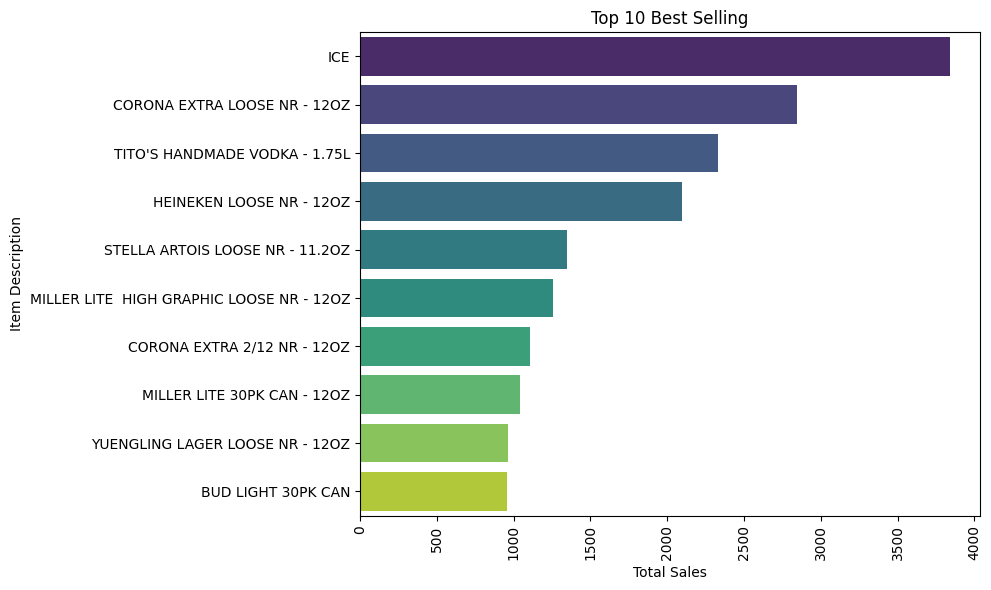

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='RETAIL SALES', y='ITEM DESCRIPTION', data=best_items.head(10), palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 Best Selling')
plt.xlabel('Total Sales')
plt.ylabel('Item Description')
plt.tight_layout()
plt.show()

In [ ]:
data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,Month
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,January
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,January
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,January
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,January
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,January


In [ ]:
best_item_type = data.groupby('ITEM TYPE')['RETAIL SALES'].sum().reset_index()
best_item_type = best_item_type.sort_values(by='RETAIL SALES', ascending=False)

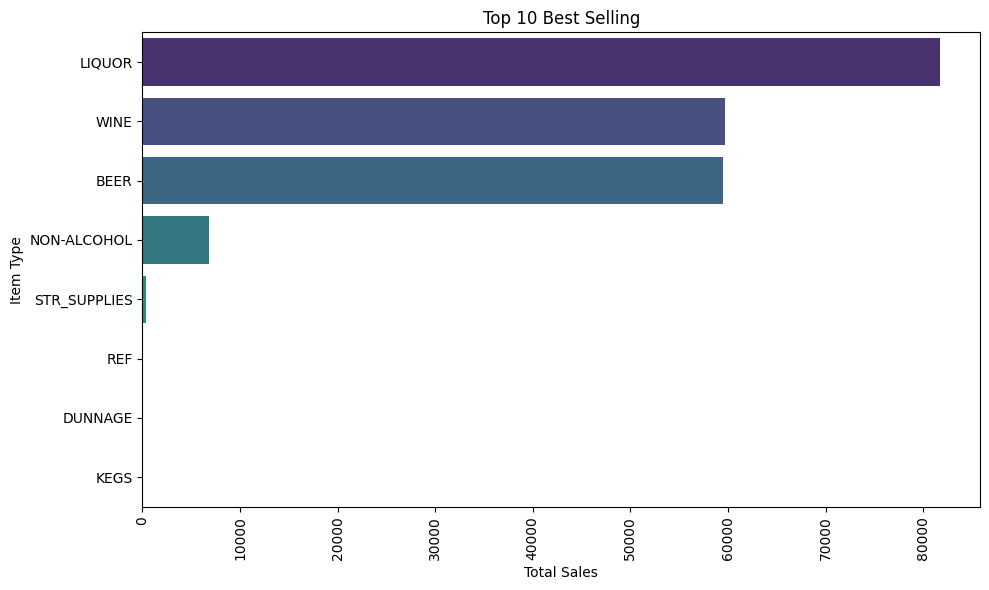

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='RETAIL SALES', y='ITEM TYPE', data=best_item_type.head(10), palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 Best Selling')
plt.xlabel('Total Sales')
plt.ylabel('Item Type')
plt.tight_layout()
plt.show()

In [ ]:
data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,Month
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,January
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,January
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,January
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,January
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,January


In [ ]:
# Buat kolom 'Date' dari 'YEAR' dan 'MONTH'
data['Date'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=1))

# Set kolom 'Date' sebagai index
data.set_index('Date', inplace=True)

In [ ]:
# Agregasi RETAIL SALES per bulan
monthly_sales = data['RETAIL SALES'].resample('M').sum()

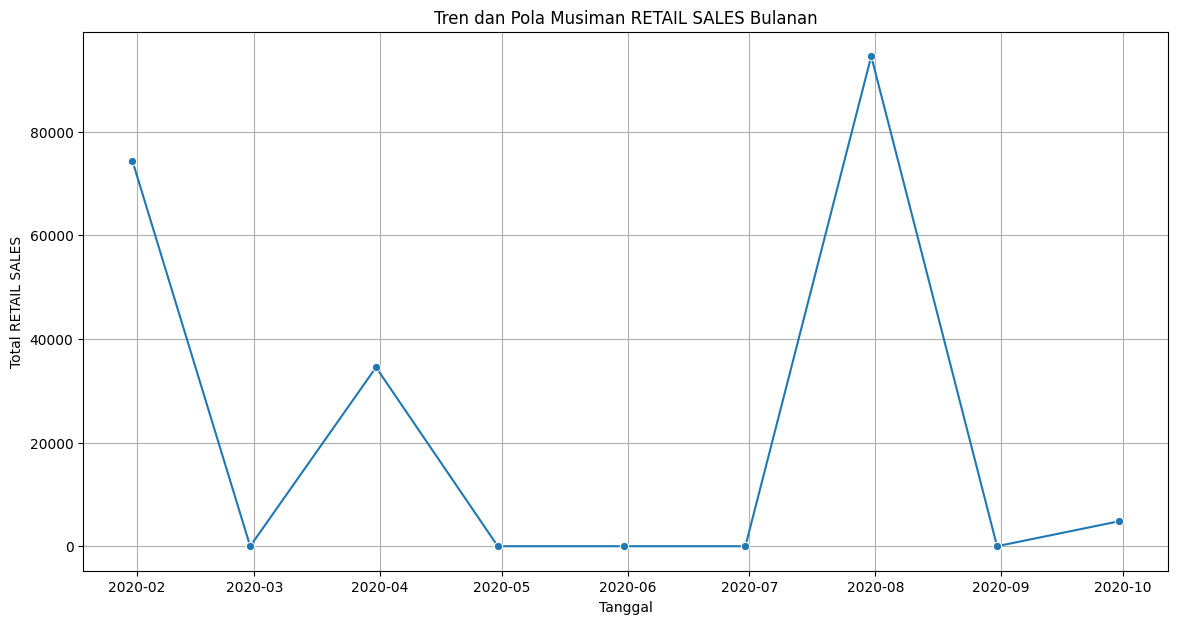

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Tren dan Pola Musiman RETAIL SALES Bulanan')
plt.xlabel('Tanggal')
plt.ylabel('Total RETAIL SALES')
plt.grid(True)
plt.show()

In [ ]:
data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,Month
Date,,,,,,,,,,
2020-01-01,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,January
2020-01-01,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,January
2020-01-01,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,January
2020-01-01,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,January
2020-01-01,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,January


# MELATIH MODEL DAN MEMBAGI DATA MENJADI 20%

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Terapkan Label Encoding pada kolom 'SUPPLIER'
data['SUPPLIER'] = label_encoder.fit_transform(data['SUPPLIER'])
data['ITEM TYPE'] = label_encoder.fit_transform(data['ITEM TYPE'])

In [ ]:
X = data[['YEAR', 'MONTH', 'SUPPLIER','ITEM TYPE','RETAIL TRANSFERS', 'WAREHOUSE SALES']]
y = data['RETAIL SALES']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 1.9563639928239887
Mean Squared Error (MSE): 87.52030442301574
R-squared (R²): 0.8425432911354368


# Interpretasi Hasil dan Analisis Faktor yang Berpengaruh

In [ ]:
coefficients = model.coef_
feature_importance = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])
print(feature_importance)


                  Coefficient
YEAR                 0.000000
MONTH                0.184350
SUPPLIER             0.001745
ITEM TYPE           -0.103034
RETAIL TRANSFERS     0.967812
WAREHOUSE SALES      0.006066


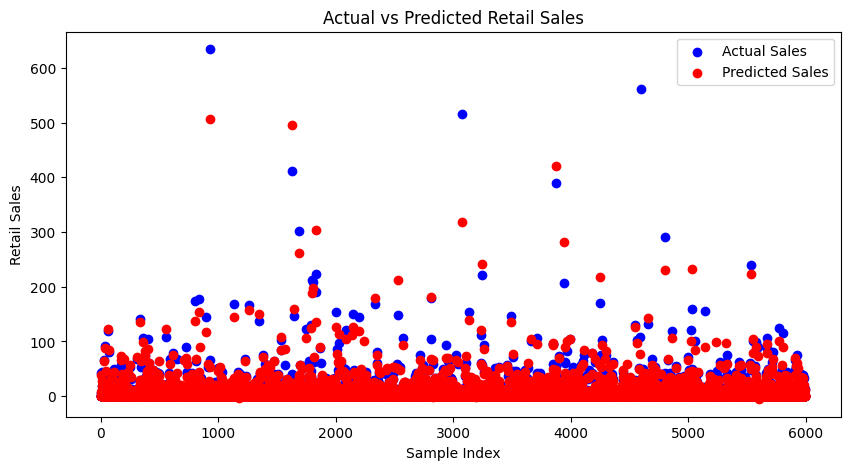

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual Sales")
plt.scatter(range(len(y_pred)), y_pred, color="red", label="Predicted Sales")
plt.title("Actual vs Predicted Retail Sales")
plt.xlabel("Sample Index")
plt.ylabel("Retail Sales")
plt.legend()
plt.show()